In [8]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [13]:
mouse_drug_data = "mouse_drug_data.csv"
clinical_trial_data = "clinicaltrial_data.csv"

mouse_df = pd.read_csv(mouse_drug_data)
clinical_df = pd.read_csv(clinical_trial_data)

mouse_and_clinical = pd.merge(mouse_df,clinical_df)
mouse_and_clinical_df = mouse_and_clinical[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug"]]
mouse_and_clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


In [18]:
# Tumor Response to Treatment

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

drug_timepoint_grouped = mouse_and_clinical_df.groupby(['Drug','Timepoint'])
mean_tumor_volume = drug_timepoint_grouped["Tumor Volume (mm3)"].mean()

# Convert to DataFrame

mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame

mean_tumor_volume_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [25]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

from scipy.stats import sem

standard_error_tv = drug_timepoint_grouped["Tumor Volume (mm3)"].sem()

# Convert to DataFrame

standard_error_tv_df = pd.DataFrame(standard_error_tv)

# Preview DataFrame

standard_error_tv_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [42]:
# Minor Data Munging to Re-Format the Data Frames


formatted_mean_df = mean_tumor_volume_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
formatted_mean_df.head()

# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [43]:
# Minor Data Munging to Re-Format the Data Frames

formatted_sem_df = standard_error_tv_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
formatted_sem_df.head()

# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


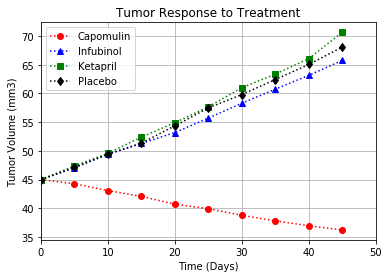

In [102]:
# Generate the Plot (with Error Bars)

ax = plt.gca()


formatted_mean_df.plot(kind='line',style=":",y='Capomulin',marker="o",color='red',ax=ax)
formatted_mean_df.plot(kind='line',style=":",y='Infubinol',marker="^",color='blue',ax=ax)
formatted_mean_df.plot(kind='line',style=":",y='Ketapril',marker="s",color='green',ax=ax)
formatted_mean_df.plot(kind='line',style=":",y='Placebo',marker="d",color='black',ax=ax)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.xlim(0, 50, 10)

plt.legend()
plt.grid()
plt.show()



In [93]:
# Save the Figure
plt.savefig(".Tumor_Treatment_Response.png")

<Figure size 432x288 with 0 Axes>